<a href="https://colab.research.google.com/github/ddiriba/Inboxicated/blob/main/MLTraining/drunk_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# get paths to images
test_path = '/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test'
val_path = '/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/val'
train_path = '/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/train'

In [ ]:
# check sizes
import os
print("Number of drunk test images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk')))
print("Number of drunk val images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/val/Drunk')))
print("Number of drunk train images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/train/Drunk')))

print("Number of sober test images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Sober')))
print("Number of sober val images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/val/Sober')))
print("Number of sober train images", len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/train/Sober')))


Number of drunk test images 300
Number of drunk val images 419
Number of drunk train images 3581
Number of sober test images 300
Number of sober val images 405
Number of sober train images 3645


In [ ]:
# import libraries
import tensorflow.keras
import tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image

import numpy as np

In [ ]:
# get shape
from PIL import Image
img = Image.open('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk/05_artemis_4_f_F_25_59_frame_01.jpg')
numpy_data = np.asarray(img)
input_shape = numpy_data.shape
print(input_shape)

(128, 96, 3)


In [ ]:
# declare data generators that are later passed to models
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.4, 
    zoom_range=0.4, 
    rotation_range=20,
		width_shift_range=0.4,
		height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest") 

val_datagen = ImageDataGenerator(rescale=1. / 255) 
test_datagen = ImageDataGenerator(rescale=1. / 255) 

In [ ]:
# define parameters
epochs = 70
batch_size = 16
img_height, img_width, channels = input_shape
training_samples = len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/train/Drunk')) + len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/train/Sober'))
validation_samples = len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/val/Drunk')) + len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/val/Sober'))
testing_samples = len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk')) + len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Sober'))
print(training_samples, validation_samples, testing_samples)

7226 824 600


In [ ]:
# load data
train_generator = train_datagen.flow_from_directory( 
    train_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 
validation_generator = val_datagen.flow_from_directory( 
    val_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')
test_generator = val_datagen.flow_from_directory( 
    test_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')


Found 7226 images belonging to 2 classes.
Found 824 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# CNN 1 (CS487 class) define model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape,padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32,(2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (2, 2), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 96, 32)       416       
                                                                 
 activation (Activation)     (None, 128, 96, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 48, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 64, 48, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 24, 32)       0         
 2D)                                                    

In [ ]:
# CNN 2 try 2
new_model = Sequential(name='drunkdetection')
print(input_shape)
new_model.add(Conv2D(input_shape=input_shape, filters = 16, kernel_size=(3,3),activation='relu', strides=(1,1), name='conv_1')) 
new_model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name='pool_1'))
new_model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=input_shape, activation='relu', strides=(1,1), name='conv_2'))
new_model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name='pool_2'))
new_model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=input_shape, activation='relu', strides=(1,1), name='conv_3'))
new_model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name='pool_3'))
new_model.add(Conv2D(filters = 128, kernel_size=(3,3), input_shape=input_shape, activation='relu', strides=(1,1), name='conv_4'))
new_model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name='pool_4'))
new_model.add(Conv2D(filters = 128, kernel_size=(3,3), input_shape=input_shape, activation='relu', strides=(1,1), name='conv_5'))
new_model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), name='pool_5'))
new_model.add(Flatten(name='flatten'))
new_model.add(Dense(64, activation='relu', name='dense_1'))
new_model.add(Dropout(rate=0.3, name='dropout'))
new_model.add(Dense(1, activation='sigmoid', name='dense_2'))
new_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
new_model.summary()

(128, 96, 3)
Model: "drunkdetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 126, 94, 16)       448       
                                                                 
 pool_1 (MaxPooling2D)       (None, 63, 47, 16)        0         
                                                                 
 conv_2 (Conv2D)             (None, 61, 45, 32)        4640      
                                                                 
 pool_2 (MaxPooling2D)       (None, 30, 22, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 28, 20, 64)        18496     
                                                                 
 pool_3 (MaxPooling2D)       (None, 14, 10, 64)        0         
                                                                 
 conv_4 (Conv2D)             (None, 12,

In [ ]:
'''
import tensorflow as tf


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name = 'drunk_model_'
checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
es = tf.keras.callbacks.EarlyStopping(
      monitor="accuracy",
      patience=10
    )

history = model.fit(train_generator, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr,checkpoint, es])

#score = model.predict(test_generator, steps_per_epoch= testing_samples // batch_size, epochs=epochs)
#print("Test Accuracy:", score)
'''


NameError: ignored

In [ ]:
# train(retrain) the model

from keras.models import load_model
model = load_model('/content/drive/MyDrive/CS_426_Team_17/current_drunk_model.h5')

import tensorflow as tf


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name = 'drunk_model_'
checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
es = tf.keras.callbacks.EarlyStopping(
      monitor="accuracy",
      patience=10
    )

history = model.fit(train_generator, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr,checkpoint, es])

Epoch 1/70
451/451 [==============================] - 1271s 3s/step - loss: 0.2563 - accuracy: 0.8840 - val_loss: 0.1730 - val_accuracy: 0.9179 - lr: 1.0000e-04
Epoch 2/70
451/451 [==============================] - 121s 268ms/step - loss: 0.2384 - accuracy: 0.8911 - val_loss: 0.1614 - val_accuracy: 0.9203 - lr: 1.0000e-04
Epoch 3/70
451/451 [==============================] - 122s 270ms/step - loss: 0.2374 - accuracy: 0.8957 - val_loss: 0.1626 - val_accuracy: 0.9216 - lr: 1.0000e-04
Epoch 4/70
451/451 [==============================] - 123s 272ms/step - loss: 0.2493 - accuracy: 0.8856 - val_loss: 0.1601 - val_accuracy: 0.9277 - lr: 1.0000e-04
Epoch 5/70
451/451 [==============================] - 124s 275ms/step - loss: 0.2428 - accuracy: 0.8913 - val_loss: 0.1626 - val_accuracy: 0.9289 - lr: 1.0000e-04
Epoch 6/70
451/451 [==============================] - 128s 284ms/step - loss: 0.2386 - accuracy: 0.8910 - val_loss: 0.1600 - val_accuracy: 0.9240 - lr: 1.0000e-04
Epoch 7/70
451/451 [====

KeyboardInterrupt: ignored

In [ ]:
#save model
model.save('current_drunk_model.h5')

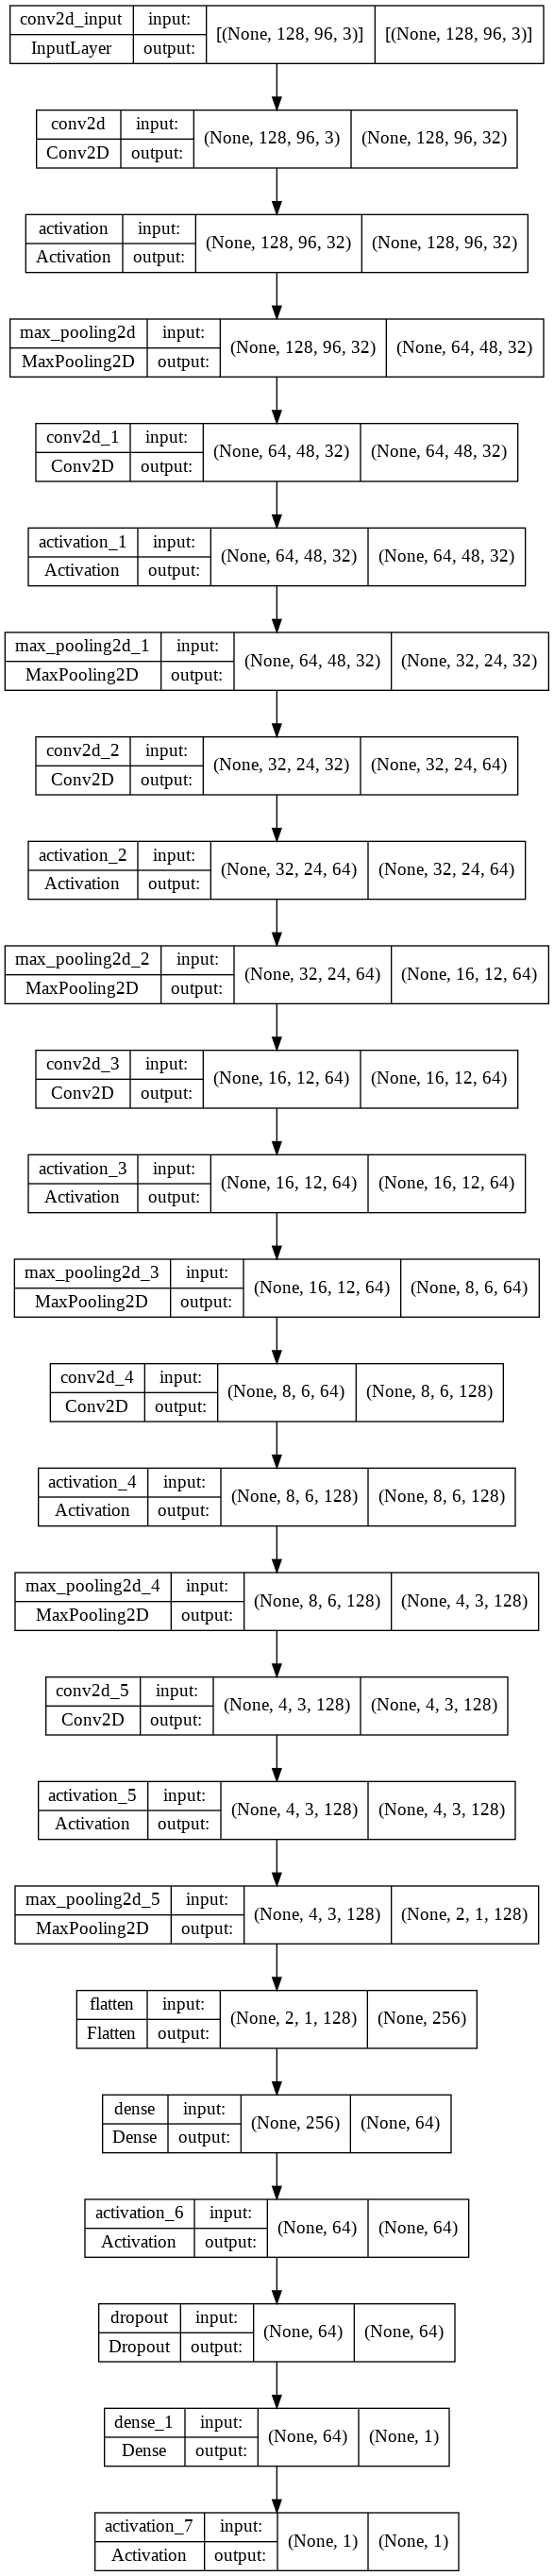

In [ ]:
# print model structure
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# define testing generator on the dataset images
test_generator = test_datagen.flow_from_directory( 
    test_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary',
    classes=['Drunk', 'Sober'])
label_map = (test_generator.class_indices)
print(label_map)

Found 600 images belonging to 2 classes.
{'Drunk': 0, 'Sober': 1}


In [ ]:
# evaluate the model
from keras.models import load_model
trained_model = load_model('/content/current_drunk_model.h5')
label_map = (test_generator.class_indices)
print(label_map)
score = trained_model.evaluate(test_generator, steps= testing_samples//batch_size, batch_size=batch_size)
print("loss: %.3f - acc: %.3f" % (score[0], score[1]))



{'Drunk': 0, 'Sober': 1}
37/37 [==============================] - 3s 77ms/step - loss: 0.6984 - accuracy: 0.7838
loss: 0.698 - acc: 0.784


In [ ]:
# unused declaration
def CNN(input_shape=(128,96,3)): 
    X_input = Input(input_shape)# Height x Width x Channel
    X = Conv2D(32, (2,2), padding='same', name ='conv_1')(X_input)
    X = Activation('relu', name ='relu_1')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_1')(X)

    X = Conv2D(32, (2,2), padding='same', name ='conv_2')(X)
    X = Activation('relu', name ='relu_2')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_2')(X)

    X = Conv2D(64, (2,2), padding='same', name ='conv_3')(X)
    X = Activation('relu', name ='relu_3')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_3')(X)

    X = Conv2D(64, (2,2), padding='same', name ='conv_4')(X)
    X = Activation('relu', name ='relu_4')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_4')(X)

    X = Conv2D(128, (2,2), padding='same', name ='conv_5')(X)
    X = Activation('relu', name ='relu_5')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool_5')(X)

    X = Conv2D(128, (2,2), padding='same', name ='conv_6')(X)
    X = Activation('relu', name ='relu_6')(X)
    X = MaxPooling2D(pool_size=(2,2),name='max_pool6')(X)

    X = Flatten(name='flatten')(X)
    X = Dense(64, name='Dense_1')(X)
    X = Activation('relu',name='relu_7')(X)
    X = Dropout(0.2,name='droput')(X)
    X = Dense(1,name='Dense_2')(X)
    X = Activation('sigmoid',name='sigmoid')(X)

    model = Model(inputs=X_input, outputs=X, name='CNN')
    return model

model = CNN(input_shape)
print(input_shape)
from tensorflow.keras.optimizers import SGD
gradient = SGD(lr=0.001)
model.compile(loss='binary_crossentropy', 
              optimizer=gradient, 
              metrics=['accuracy'])

model.summary()
